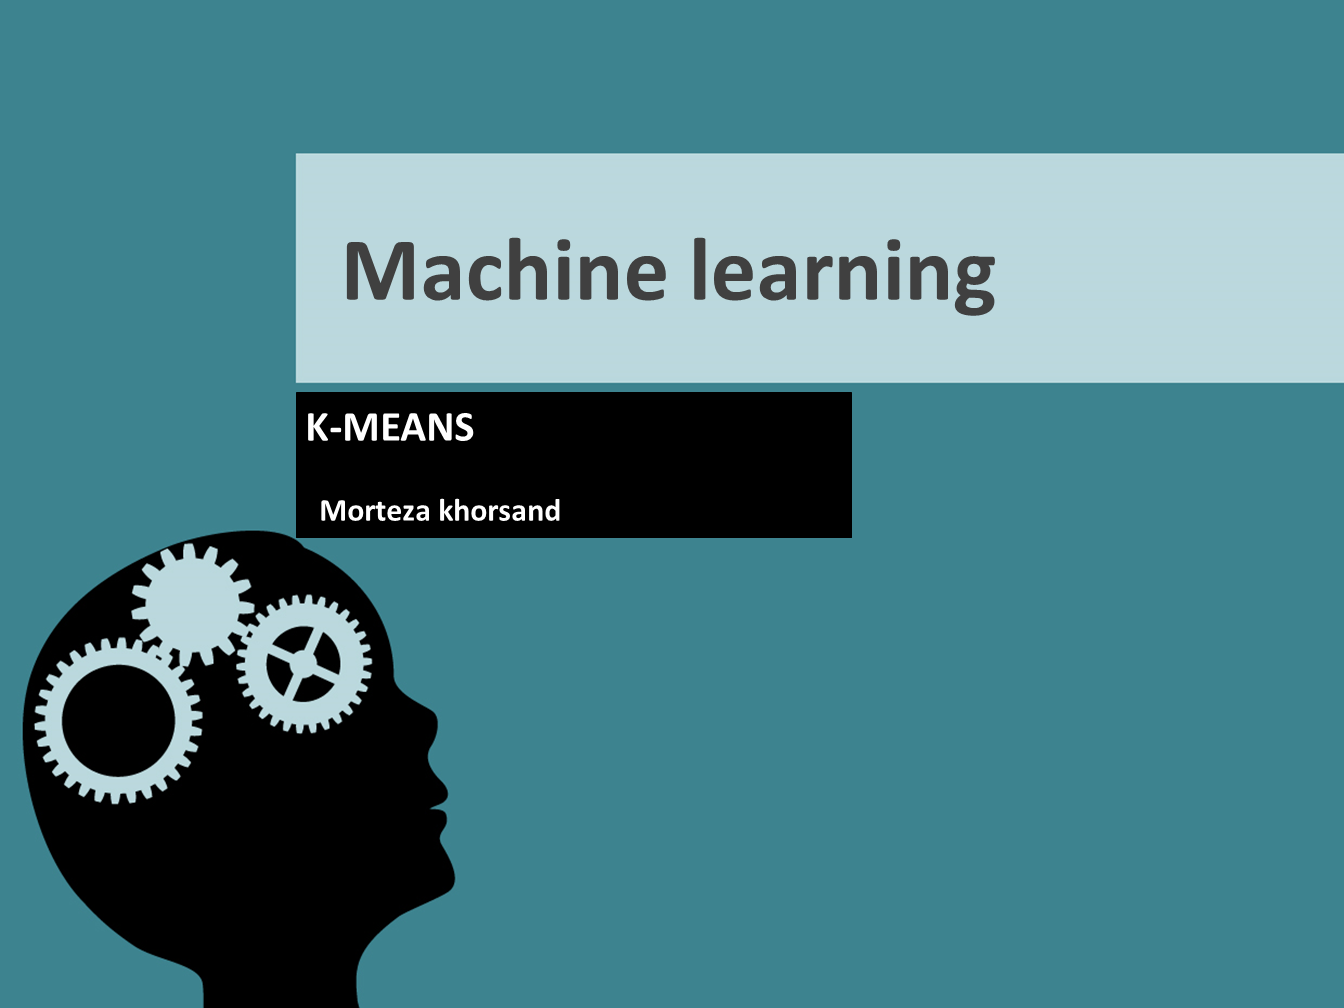

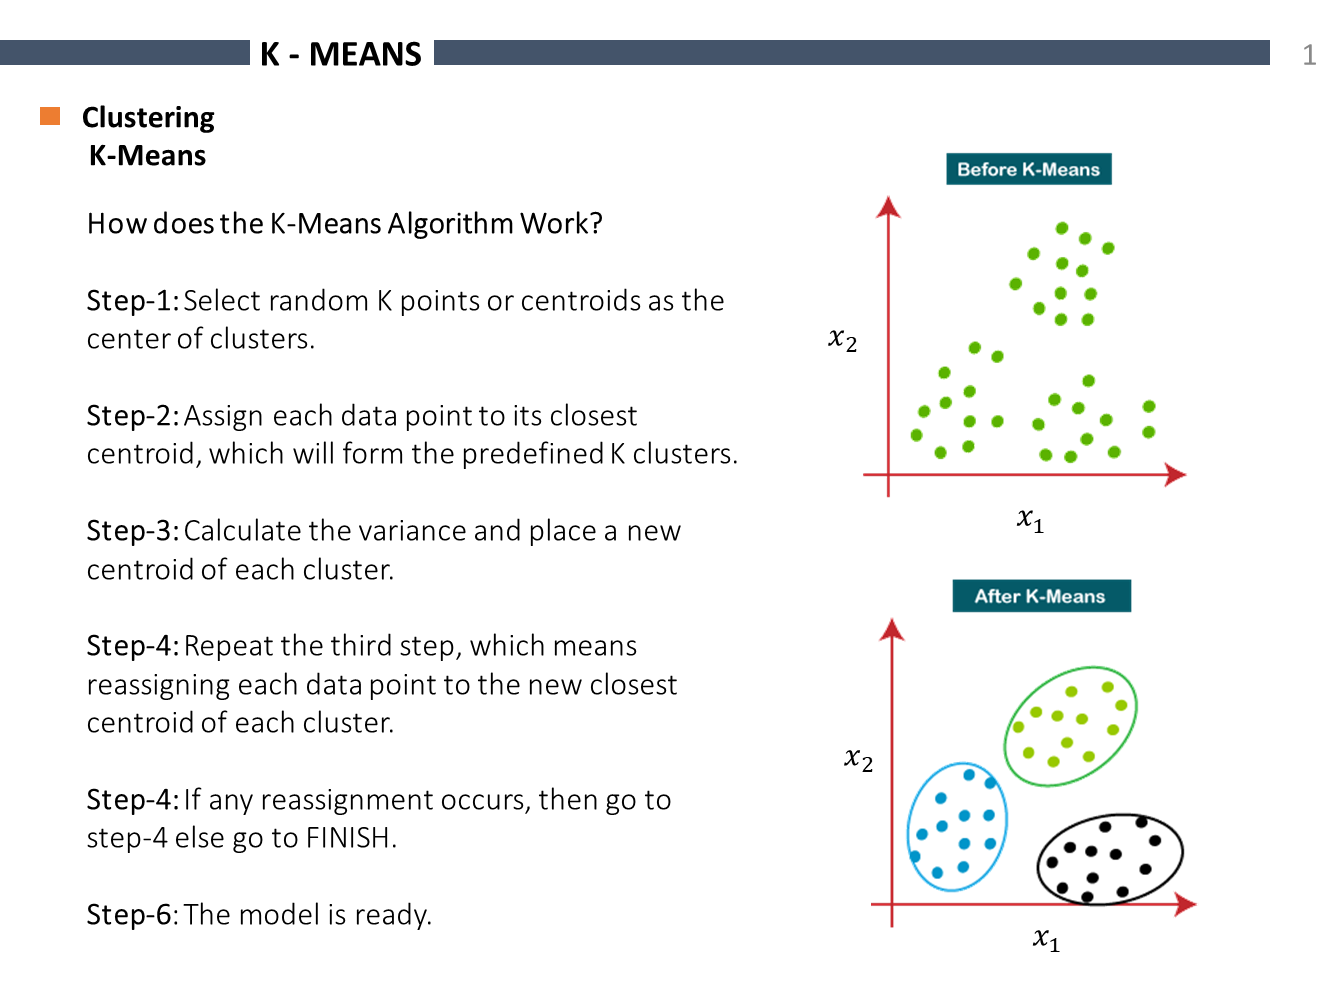

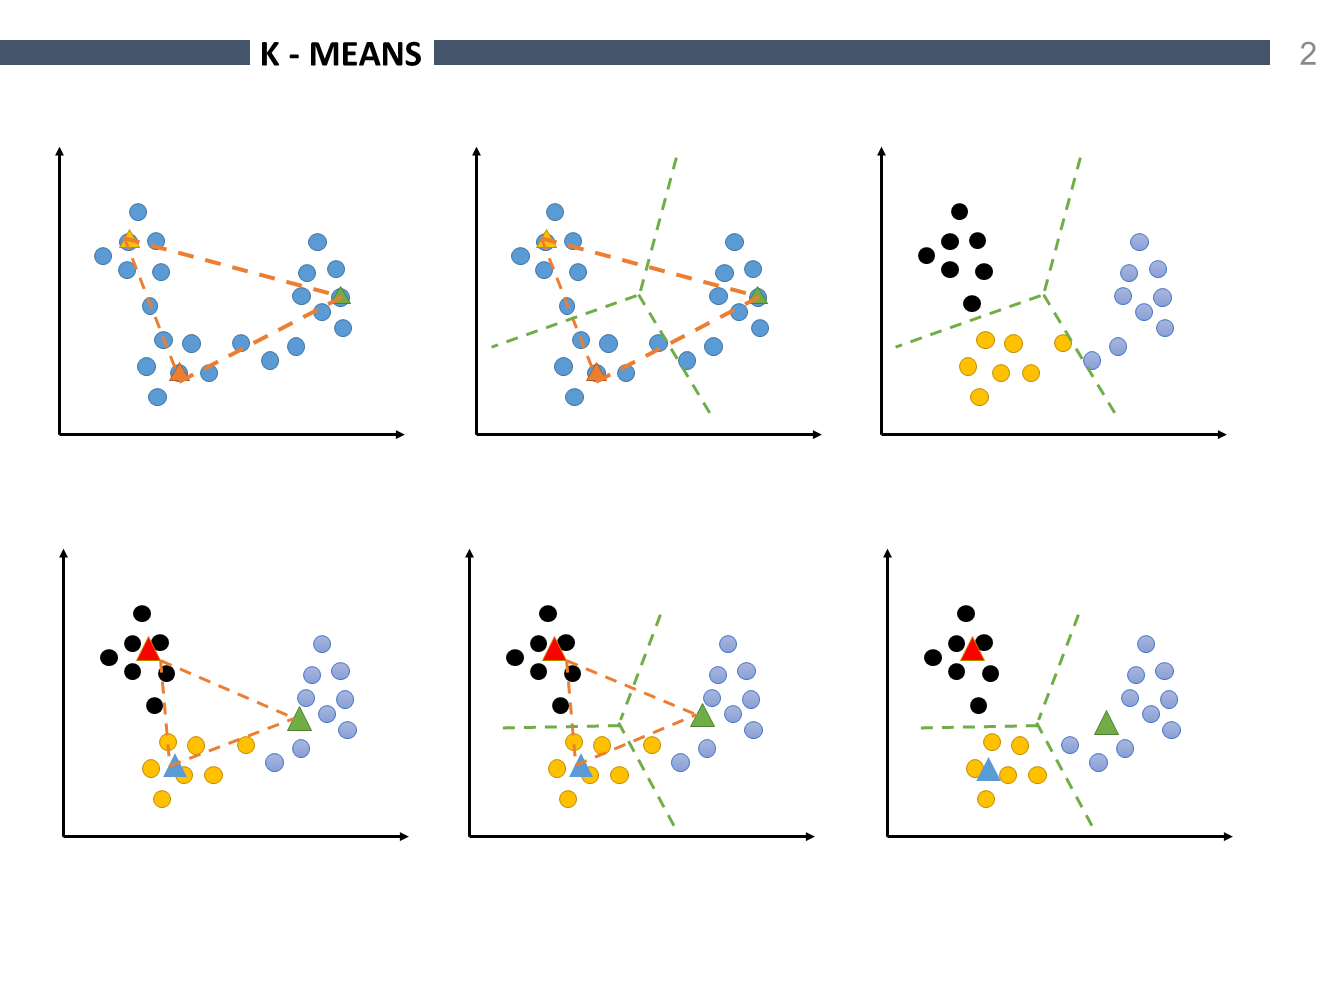

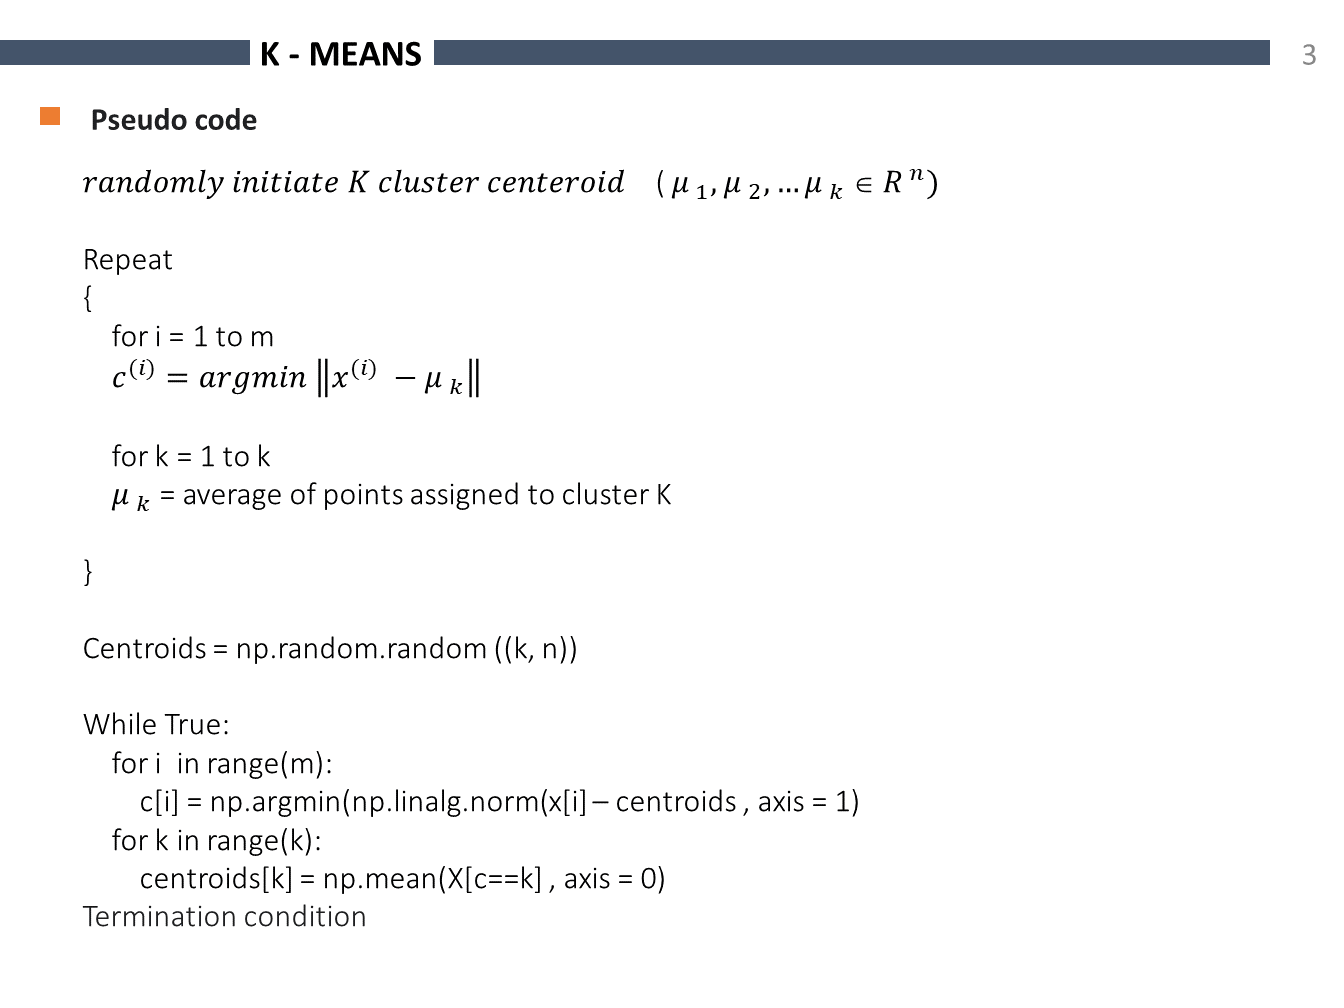

In [10]:
import os
os.environ["OMP_NUM_THREADS"] ='4'
#C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
#warnings.warn

In [11]:
#import libraries and data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
# create random data
X , y = make_blobs(n_samples=150, centers=3, cluster_std=1.2, random_state=10)



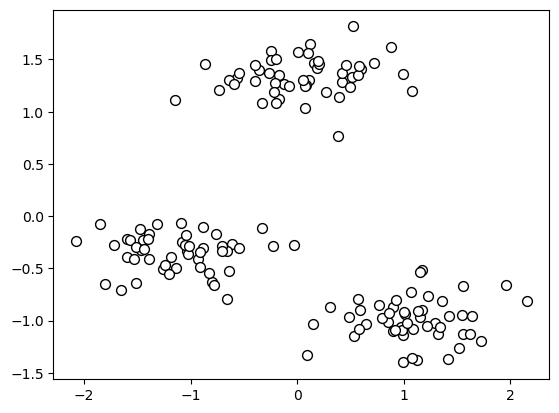

In [12]:
# Normalize X
mu = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mu) / std

# plot data
plt.scatter(X[:, 0], X[:, 1], edgecolors='k', s=50, c='w')
plt.show()




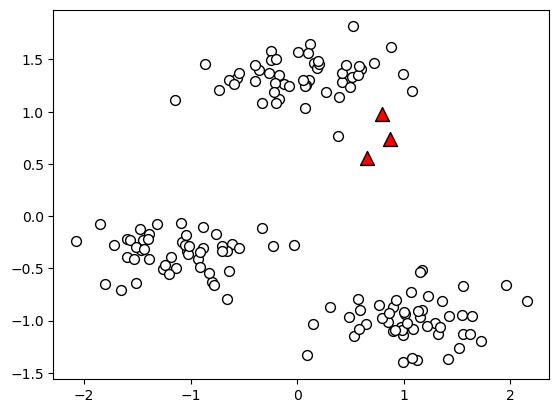

In [4]:
m , n= X.shape
K=3
initial_centroids= np.random.rand(K,n)


#plot centeroids
plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], edgecolors='k', s=100, c='red' , marker = "^")
plt.scatter(X[:, 0], X[:, 1], edgecolors='k', s=50, c='w'  )
plt.show()

In [13]:
centroids=initial_centroids.copy()
print(centroids)

[[0.87297331 0.73952191]
 [0.65928464 0.56123203]
 [0.79516162 0.97372791]]


In [6]:
cluster_ids=np.array([np.argmin(np.linalg.norm(X[i] - centroids , axis = 1)) for i in range(m)])

    
print(cluster_ids)
        

[1 2 2 1 1 2 1 2 1 1 2 2 1 1 2 2 2 1 2 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 1 1 1
 2 0 2 1 1 2 2 1 1 2 1 1 2 2 1 1 1 1 1 1 1 2 2 2 1 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 2 1 1 1 1 2 1 2 1 1 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2 1 2 1 2 2
 1 2 2 1 1 1 2 1 1 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 2 1 2 2 2 1 1
 1 1]


In [14]:
for k in range(K):
    centroids[k] = np.mean(X[cluster_ids==k], axis=0)    #در ایکس اونهایی که انتخاب شدن به صورت ستونس زیر هم هستند یعنی همه اونایی که مثلا ایدیشون صفراست. ماتریس ایکس روبکشیم معلوم میشه
centroids

array([[ 2.05851469, -0.73481985],
       [-0.0775947 , -0.60107719],
       [ 0.08255718,  1.36477202]])

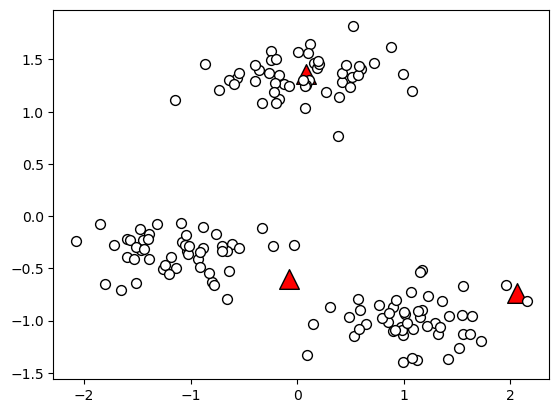

In [15]:
plt.scatter(centroids[:, 0], centroids[:, 1], edgecolors='k', s=200, c='red' , marker = "^")
plt.scatter(X[:, 0], X[:, 1], edgecolors='k', s=50, c='w'  )
plt.show()

In [16]:
cluster_ids=np.array([np.argmin(np.linalg.norm(X[i] - centroids , axis = 1)) for i in range(m)])

    
print(cluster_ids)

[1 2 2 1 1 2 1 2 0 0 2 2 1 1 2 2 2 0 2 1 1 0 1 1 1 1 0 1 2 2 0 1 1 2 0 1 0
 2 0 2 1 1 2 2 0 1 2 2 1 2 2 1 1 0 0 0 1 1 2 2 2 0 2 0 1 1 1 0 1 1 1 0 1 0
 1 0 1 0 1 2 0 1 0 1 2 1 2 1 2 1 1 1 0 2 2 2 1 2 1 1 1 0 1 1 2 2 1 2 1 2 2
 1 2 2 0 0 0 2 0 1 1 1 1 0 2 2 1 0 2 1 1 1 1 2 0 1 1 1 2 1 0 2 1 2 2 2 1 1
 0 1]


In [17]:
for k in range(K):
    centroids[k] = np.mean(X[cluster_ids==k], axis=0)    #در ایکس اونهایی که انتخاب شدن به صورت ستونس زیر هم هستند یعنی همه اونایی که مثلا ایدیشون صفراست. ماتریس ایکس روبکشیم معلوم میشه
centroids

array([[ 1.30323512, -0.99493691],
       [-0.67151137, -0.50937076],
       [ 0.03969005,  1.33921518]])

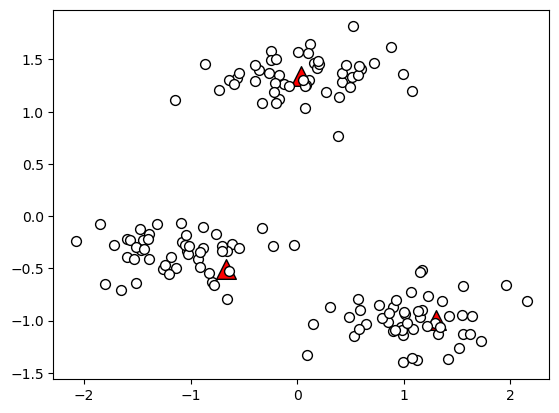

In [18]:
plt.scatter(centroids[:, 0], centroids[:, 1], edgecolors='k', s=200, c='red' , marker = "^")
plt.scatter(X[:, 0], X[:, 1], edgecolors='k', s=50, c='w'  )
plt.show()

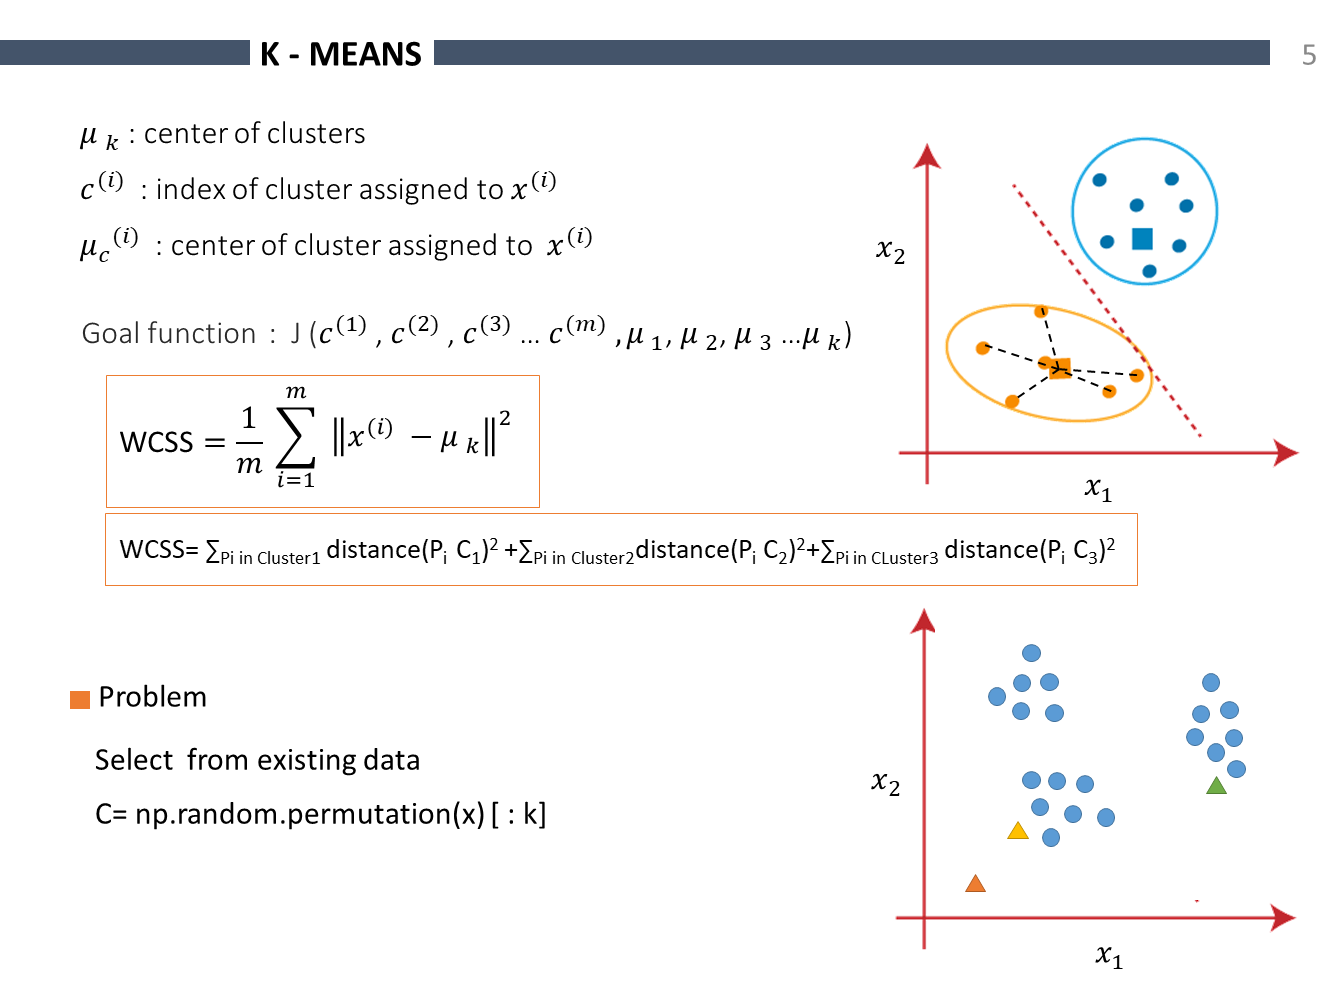

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
def kmeans(X, initial_centroids):
    m = X.shape[0]
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    initial_cluster_ids =np.zeros((m,))
    cost=0
    
    while True:
        cluster_ids = np.array([np.argmin(np.linalg.norm(X[i] - centroids, axis=1)) for i in range(m)])
        
        # update cluster centers
        for j in range(K):
            centroids[j] = np.mean(X[cluster_ids==j], axis=0)    #میانگین بگیر بذار به عنوان مرکز 
                                         
         # stop
        if np.all(cluster_ids == initial_cluster_ids):
            for z in range(K):
                cost+=1/m * (np.linalg.norm(X[cluster_ids==z] - centroids[z])**2)     # هر داده را از مرکز خودش کم کن
            return cost , initial_cluster_ids , centroids
        else:
            initial_cluster_ids = cluster_ids
                                         
     
        
    

[47.029062199797174, 12.21527718761187, 4.167450222191264, 3.6894595293854398, 3.224286583361303, 2.843484126290323, 2.6948171538429073, 2.3008401012827138, 2.2250155257616107]
--------------------------------------------------------
[[ 2.61164305  4.95788186]
 [ 5.51998791 -9.57304198]
 [-0.13936238 -5.54381213]]
--------------------------------------------------------
[1 0 2 2 0 2 2 2 2 2 1 0 1 1 2 2 2 1 1 1 2 1 2 2 0 0 1 0 1 1 1 1 1 1 1 0 0
 1 0 0 0 2 0 0 1 0 2 2 1 1 1 2 0 2 0 2 2 1 0 0 2 2 1 0 2 1 0 2 0 0 0 2 2 1
 2 2 1 1 1 2 2 2 0 2 0 1 0 2 2 0 0 1 1 0 2 1 0 1 1 0 0 2 0 0 2 1 2 0 1 2 2
 0 1 0 2 1 0 2 2 0 1 1 1 1 1 1 0 2 0 0 0 2 0 2 2 2 2 1 2 2 1 0 2 1 0 1 2 0
 0 2 0 1 1 2 2 0 2 2 0 2 0 2 1 1 0 0 0 0 1 2 0 2 2 2 1 1 2 1 1 1 2 2 1 2 0
 0 2 2 2 0 2 2 1 1 0 1 0 0 2 2 2 1 0 2 1 1 0 0 0 2 0 0 0 0 0 0 1 1 0 2 0 2
 1 1 2 0 2 0 1 2 0 1 0 1 2 2 1 0 2 2 0 2 0 1 1 0 2 2 2 0 2 0 1 0 0 0 0 2 0
 0 1 1 0 2 0 1 1 1 0 1 1 0 2 1 2 1 0 0 1 1 1 0 2 0 0 1 1 1 1 2 2 0 0 0 2 0
 2 1 1 2 2 1 2 1 1 1 2 2 1 

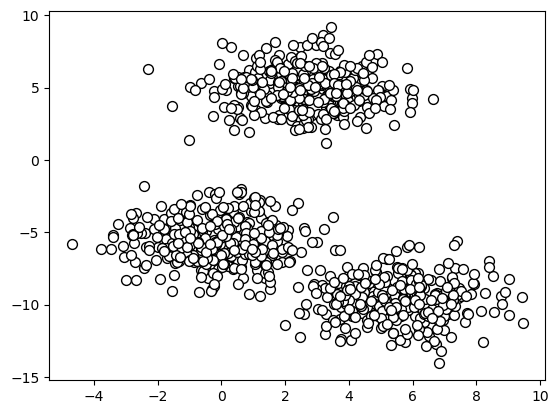

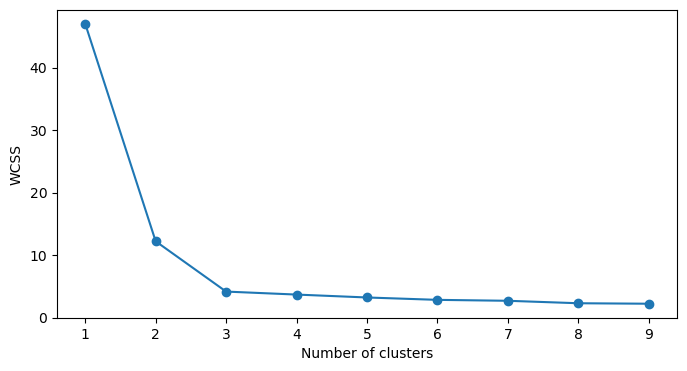

In [3]:
X, y = make_blobs(n_samples=1000, centers=3, cluster_std=1.5, random_state=10)
# plot data
plt.scatter(X[:, 0], X[:, 1], edgecolors='k', s=50, c='w');




costs=[]
best_centeroids=[]
final_ids=[]
for i in range(1 , 10):
    initial_centroids= np.random.permutation(X[ : i])
    A= kmeans(X , initial_centroids)
    costs.append(A[0])
    final_ids.append(A[1])
    best_centeroids.append(A[2])
    
print(costs)
print("--------------------------------------------------------")
print(best_centeroids[2])
print("--------------------------------------------------------")
print(final_ids[2])


plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), costs, marker='o')
plt.xticks(range(1, 10))
plt.xlabel('Number of clusters')
plt.ylabel("WCSS")
plt.show()


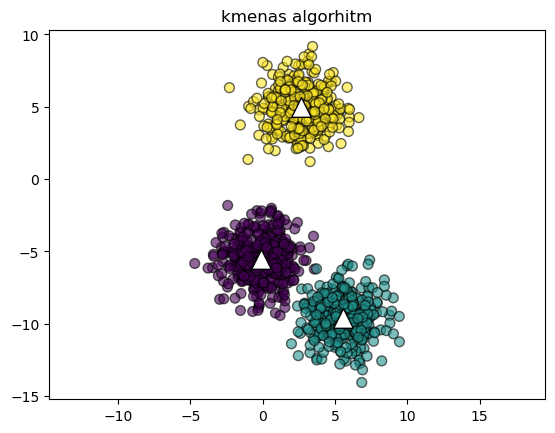

In [22]:
centroids= best_centeroids[2]
ids=final_ids[2]

K = centroids.shape[0]
    
plt.figure()
plt.scatter(X[:, 0], X[:, 1], s=50,c=ids , edgecolors='k', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='^', s=200, c="white", edgecolors='k')
plt.title("kmenas algorhitm")
plt.axis('equal')
plt.show()
    


# sklearn

In [23]:
from sklearn.cluster import KMeans
import pandas as pd
#the first two one(MinMaxScaler,StandardScaler) can scale and fit the data , they are clasess.
#the third one(scale) scale the data,  that is a method.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt

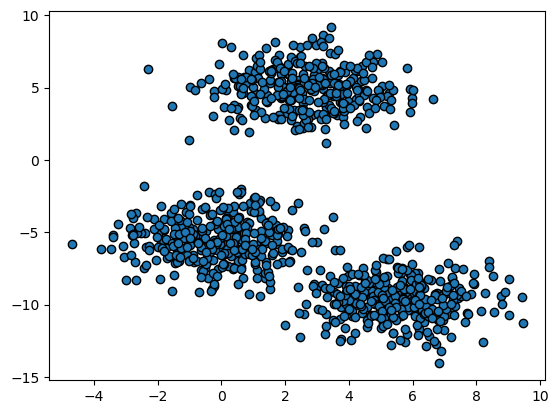

In [24]:
X, y = make_blobs(n_samples=1000, centers=3, cluster_std=1.5, random_state=10)



plt.scatter(X[:, 0], X[:, 1],  cmap=plt.cm.Set1, edgecolor="k")




In [26]:
X1_normalized= scale(X[:, 0] , axis= 0 , with_mean= True , with_std= True)
X2_normalized= scale(X[:, 1] , axis= 0 , with_mean= True , with_std= True)



In [27]:
d = {'first_value': X1_normalized, 'second_value':X2_normalized}
df=pd.DataFrame(d)
df

,first_value,second_value
0,0.541071,-1.070662
1,-0.173577,0.981308
2,-0.983675,-0.465678
3,-0.904900,-0.067413
4,-0.567329,1.491656
...,...,...
995,-1.446594,0.053757
996,1.100001,-0.660024
997,1.224302,1.304300
998,-0.868375,1.108034


In [28]:
wcss = []
for i in range(1,10):
    km= KMeans(n_clusters= i ) 
    km.fit(df[["first_value","second_value"]])
    wcss.append(km.inertia_)
    
wcss

[1999.9999999999995,
 964.9482561631145,
 329.0090988040914,
 268.1966585182072,
 203.78400010045277,
 151.65696339152393,
 133.62066616440416,
 116.5614373429577,
 102.31137820719674]

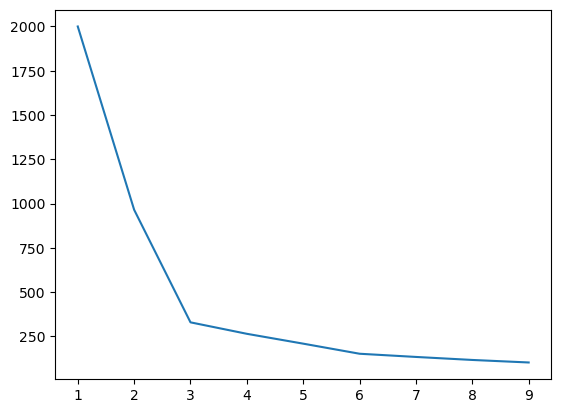

In [18]:
plt.plot(range(1, 10),wcss)
plt.show()

In [29]:
km= KMeans(n_clusters= 3 )                                                   #constructor
y_predict=km.fit_predict (df[["first_value","second_value"]])                                #method fit and predict

df["predict"] = y_predict
df


,first_value,second_value,predict
0,0.541071,-1.070662,1
1,-0.173577,0.981308,0
2,-0.983675,-0.465678,2
3,-0.904900,-0.067413,2
4,-0.567329,1.491656,0
...,...,...,...
995,-1.446594,0.053757,2
996,1.100001,-0.660024,1
997,1.224302,1.304300,0
998,-0.868375,1.108034,0


In [30]:
km.cluster_centers_

array([[-0.0162935 ,  1.32842067],
       [ 1.04554222, -0.97308104],
       [-1.04184561, -0.34361576]])

Text(0, 0.5, 'second_value')

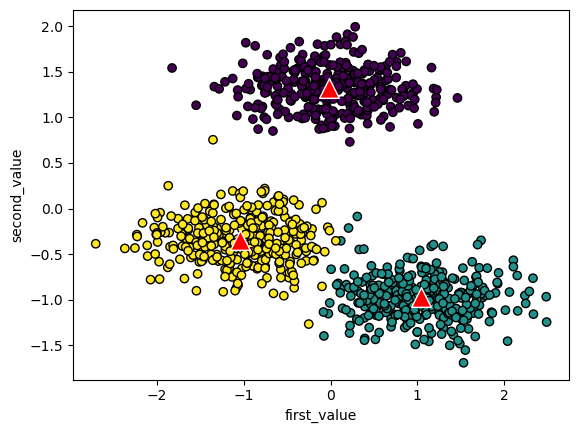

In [31]:
plt.scatter(df["first_value"], df["second_value"],  c=df["predict"], edgecolor="k")
plt.scatter(km.cluster_centers_[: ,0] ,km.cluster_centers_[: ,1] , marker = "^" , s=200 , c="red" , edgecolors= "white") 
plt.xlabel("first_value")
plt.ylabel("second_value")

In [35]:
from sklearn.datasets import load_iris

In [36]:
iris=load_iris()

In [37]:
kmn=KMeans(n_clusters= 3)
kmn.fit(iris.data)
labels=kmn.predict(iris.data)
centroids=kmn.cluster_centers_


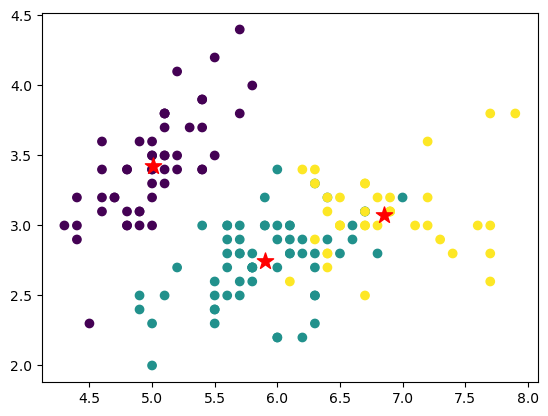

In [38]:
plt.scatter(iris.data[ : , 0] , iris.data[: ,1] , c= labels)
plt.scatter(centroids[ : , 0] , centroids[: ,1] , marker= "*" , c= "red" , s=150)
plt.show()